## UVLT Heatmaps - Annual Unrestricted Donations Over Time, By Town
### Group: JAMRS

##### Notebook Overview

In this notebook, we created three heatmaps. The first examines annual UR donation amounts over time by ALL towns in the dataset. The second and the third examine annual UR donation amounts over time in two subsets of the dataset, above and below the median "Total # of Unrestricted Donations".

See md cells throughout for a discussion of what we found. 


In [28]:
#import relevant and necessary libraries and data cleaning tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob as lsdir
import os

%matplotlib inline

In [29]:
#code from Professor Manning to set up and read in the relevant UVLT data 
data_readers = {'xlsx': pd.read_excel, 'xls': pd.read_excel, 'dta': pd.read_stata}
get_extension = lambda x: x.split('.')[-1]


def read_data(datadir, readers):
    files = lsdir(os.path.join('..', datadir, '*'))
    readable_files = []
    data = []
    for f in files:
        ext = get_extension(f)
        if ext in readers.keys():
            readable_files.append(f)
            data.append(data_readers[ext](f))
    return readable_files, data


fnames, data = read_data('data', data_readers)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [30]:
#summary of the data files that are now read into the notebook
fnames

['../data/UVLTdata_individual.dta',
 '../data/UVLTdata_final.dta',
 '../data/Direct Mailing Analysis.xlsx',
 '../data/UVLTDataAnalysis.xls',
 '../data/TownLevelData.xlsx',
 '../data/TownLevelData.dta',
 '../data/CensusInfoUpperValley2015JH.xlsx']

In [31]:
#rename relevant columns and rows in UVLT individual data to be more easily readable
names={'U_Tot_Amt': 'Total Unrestricted Donations',
      'U_Tot_Cnt': 'Total # Unrestricted Donations',
       'U200001' : '2000-01',
        'U200102' : '2001-02',
        'U200203' : '2002-03',
        'U200304' : '2003-04',
        'U200405' : '2004-05',
        'U200506' : '2005-06',
        'U200607' : '2006-07',
        'U200708' : '2007-08',
        'U200809' : '2008-09',
        'U200910' : '2009-10',
        'U201011' : '2010-11',
        'U201112' : '2011-12',
        'U201213' : '2012-13',
        'U201314' : '2013-14',
        'U201415' : '2014-15',
        'U201516' : '2015-16',
        'U201617' : '2016-17',
        'U201718' : '2017-18',
        'U201819' : '2018-19'}
town_names = {'All Other Towns' : 'All Other',
             'All Other Towns CT' : 'Other CT',
             'All Other Towns MA' : 'Other MA',
             'All Other Towns ME' : 'Other ME',
             'All Other Towns NH' : 'Other NH',
             'All Other Towns VT' : 'Other VT'}
data[1].rename(names, inplace=True, axis=1)
data[1].rename(town_names, inplace=True, axis=0)

In [32]:
#copy each set of data into more memorably named versions
final_data=data[1].copy()

In [33]:
final_data.head()

,ContactID,State,TownID,Town,LandOwnerTownID,DeceasedDateYN,Total Unrestricted Donations,Total # Unrestricted Donations,2000-01,2001-02,...,E201819,DeceasedDate,ConservedOwner,Nprojects,Nacres,Nmembers,MedianHHIncome,MeanHHIncome,PercBAplus,PercAge55Plus
0,2903.0,VT,2.0,Bradford,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,20.0,2258.32,7.0,48056.0,58716.0,30.6,32.912306
1,11472.0,VT,2.0,Bradford,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,20.0,2258.32,7.0,48056.0,58716.0,30.6,32.912306
2,9206.0,VT,2.0,Bradford,0.0,0.0,75.0,2.0,0.0,0.0,...,0.0,NaN,0.0,20.0,2258.32,7.0,48056.0,58716.0,30.6,32.912306
3,12910.0,VT,2.0,Bradford,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,20.0,2258.32,7.0,48056.0,58716.0,30.6,32.912306
4,5029.0,VT,2.0,Bradford,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,20.0,2258.32,7.0,48056.0,58716.0,30.6,32.912306


In [34]:
# drop columns that are irrelevant to this analysis. All we need is information about towns and UR donations over the years.
UR_year_data = final_data.loc[:,'TownID':'2018-19']
UR_year_data = UR_year_data.drop('LandOwnerTownID', axis = 1)
UR_year_data = UR_year_data.drop('DeceasedDateYN', axis = 1)
UR_year_data.head()

,TownID,Town,Total Unrestricted Donations,Total # Unrestricted Donations,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,...,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
0,2.0,Bradford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,Bradford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,Bradford,75.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,Bradford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,Bradford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#compress the data into 1 row per town, instead of 1 row per individual, so that we can put towns on the y-axis of the heatmap
UR_town_year1 = UR_year_data.groupby('Town').aggregate(np.sum)
UR_town_year = UR_town_year1.drop(['TownID', 'Total Unrestricted Donations', 'Total # Unrestricted Donations'], axis = 1)
UR_town_year.head()

,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
Town,,,,,,,,,,,,,,,,,,,
,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
All Other Towns,18389.40,16366.38,30421.22,55929.95,46587.15,47273.95,53062.11,55740.43,34371.21,60858.74,16954.39,24992.1,16309.1,23085.01,15712.04,16247.27,16041.05,20087.91,8441.0
All Other Towns CT,600.00,840.00,635.00,1365.00,1190.00,1710.00,2125.00,1225.00,2200.00,1260.00,2600.00,7150.0,3125.0,3550.00,6750.00,8900.00,9750.00,9500.00,2300.0
All Other Towns MA,6530.00,6255.00,48075.00,14790.48,17903.01,19202.21,28582.70,58627.42,19528.00,49189.89,41835.01,47688.0,35579.6,44753.40,51405.10,24428.00,25934.41,41506.08,14500.0
All Other Towns ME,1619.28,1683.29,1125.00,1100.00,1205.00,1600.00,1140.00,1040.00,760.00,625.00,425.00,85.0,250.0,325.00,375.00,555.00,425.00,580.00,1000.0


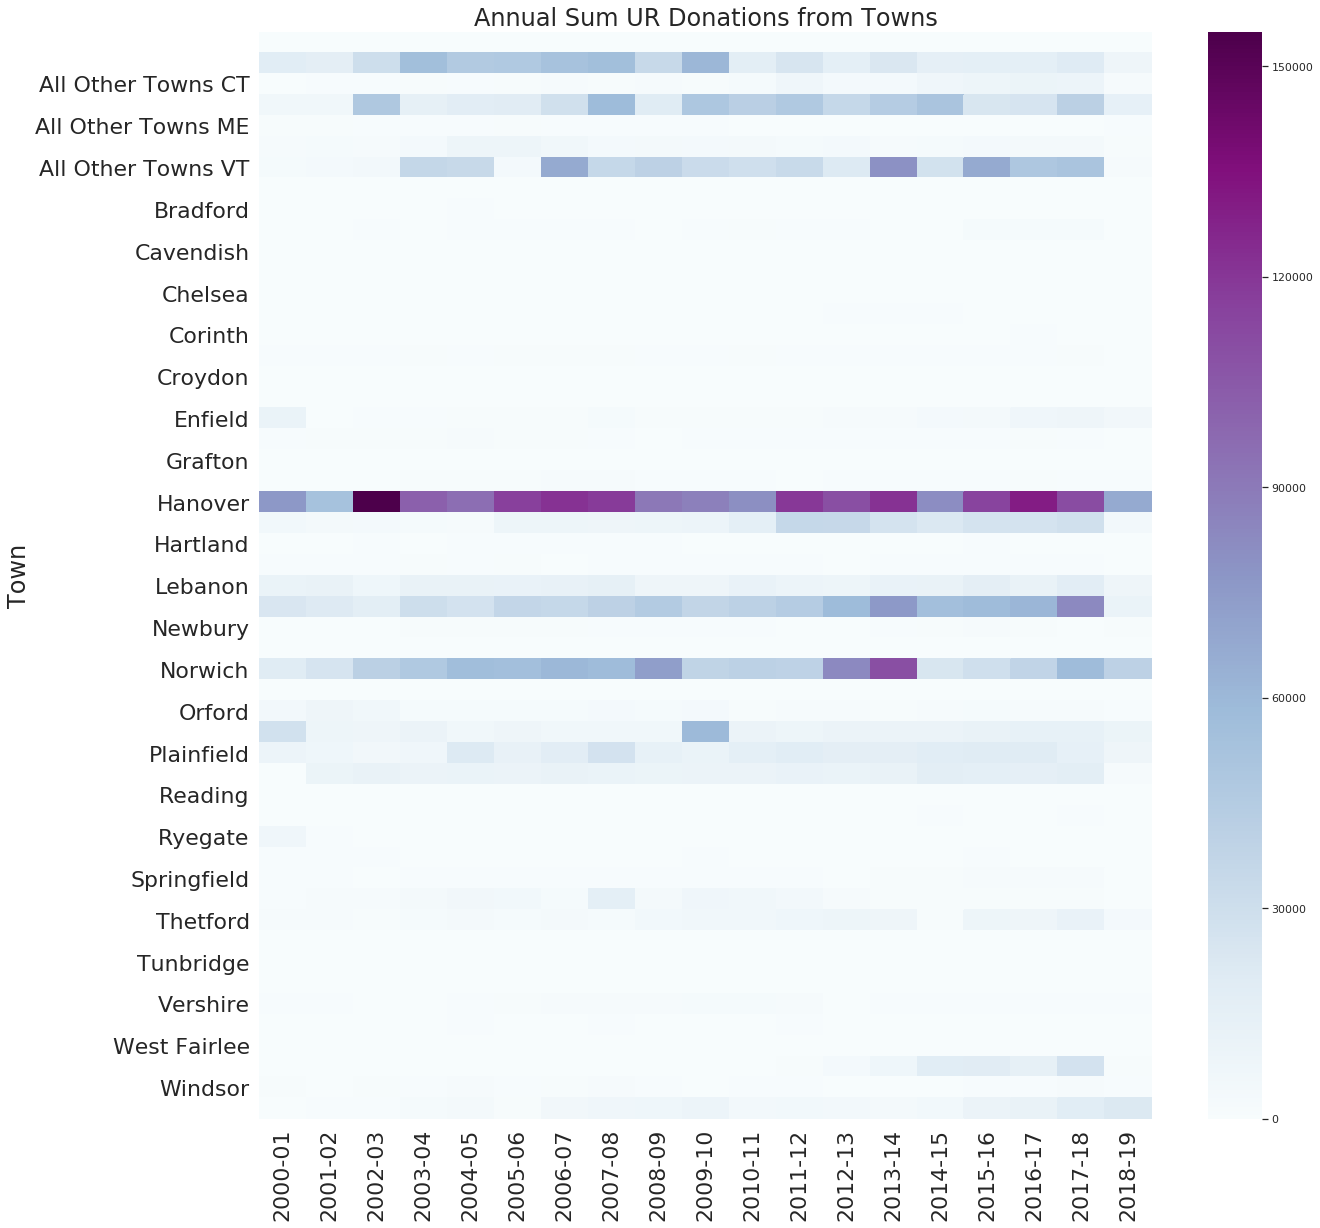

In [36]:
# create a heatmap plots town against year and represents total sum unrestricted donations with the color
plt.figure(figsize=(20,20))
plt.title('Annual Sum UR Donations from Towns')
sns.set(font_scale=1)
sns.heatmap(UR_town_year, cmap = 'BuPu')

### Midpoint: What can we learn from this heatmap?
In short, not much. Over the years, Hanover has given the most to this organization by far. Norwich, Lyme, and "Other Towns" in MA, VT, and elsewhere have also donated substantially.

There doesn't seem to be a consistent trend across towns toward donating more or less over time. There does not appear to be a particular year when multiple towns had a marked increase or decrease in total donations, with the potential exception of 2013-14 when Hanover, Norwich, Lyme, and All Other Towns VT seemed to have higher donation sums than other years. Was there something special about the way the organization solicited donations in those towns in 2013-14? Was there an event or a fundraiser that was particularly effective?


### What's next?
A notable issue with this heatmap is the enormous range of the sums. Many towns appear to have donated nothing at all when put on a scale compared to towns like Hanover, which has many UVLT members and wealthy town members. What if we compared the towns with few donations only to each other? Would more fine-grained differences between towns / patterns emerge? 

To explore this, we sorted the dataframe by total # of unrestriced donations, then divided the dataframe in two at the median. Below, we created two heatmaps: one compares towns with a "Total # Unrestricted Donations" that is below the median, and the other compares towns with a "Total # Unrestricted Donations" that is above the median.


In [37]:
#sort towns by UR donations count.
UR_towns_sorted = UR_town_year1.sort_values(by=['Total # Unrestricted Donations'])

In [38]:
UR_towns_sorted.head(53)

,TownID,Total Unrestricted Donations,Total # Unrestricted Donations,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,...,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
Town,,,,,,,,,,,,,,,,,,,,,
,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Newport,23.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Dorchester,11.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Orange,25.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cavendish,4.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bath,1.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Croydon,10.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
West Fairlee,1554.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Unity,39.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [39]:
#extract downs below the median donation count
bottom_half_towns = UR_towns_sorted.loc['Newport':'Piermont',:]
bottom_half_towns.head(30)

,TownID,Total Unrestricted Donations,Total # Unrestricted Donations,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,...,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
Town,,,,,,,,,,,,,,,,,,,,,
Newport,23.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0
Dorchester,11.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0
Orange,25.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0
Cavendish,4.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0
Bath,1.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0
Croydon,10.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0
West Fairlee,1554.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0
Unity,39.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0
Topsham,1036.0,250.00,1.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,250.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0


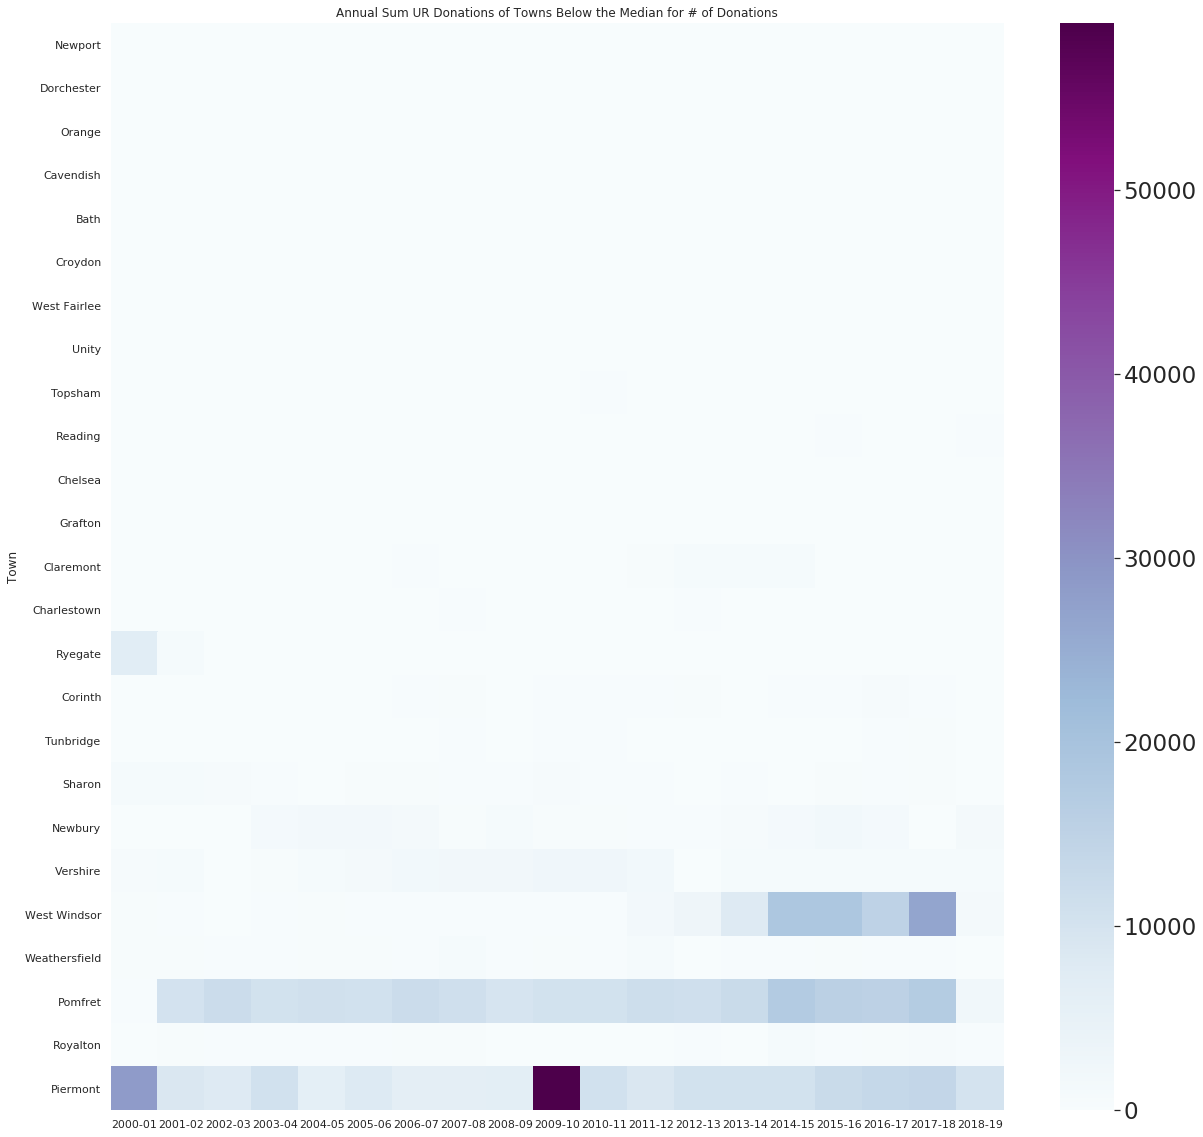

In [40]:
#represent below-median towns on a heatmap
REAL_bottom_half = bottom_half_towns.drop(['TownID','Total Unrestricted Donations','Total # Unrestricted Donations'], axis = 1)
plt.figure(figsize=(20,20))
plt.title('Annual Sum UR Donations of Towns Below the Median for # of Donations')
sns.set(font_scale=2.1)
sns.heatmap(REAL_bottom_half, cmap = 'BuPu')

### What can we learn from this heatmap?

Even after including only towns below the median for "Total # UR Donations", we see very little difference between most of the towns. It appears that the majority of the towns below the median have donated nothing, or a negligible amount, since 2000. 

A few findings: 
* It seems that donations are on an upward trend in West Windsor. What has changed in that town since 2012, when donations first started to rise? 
* The citizens of Pomfret seem to have given pretty consistenly over time. This town would be a good target for continued fundraising.
* What happened in Piermont in 2009-2010? The annual sum for that year was much higher than any other year for that town.

In [41]:
#extract downs above the median donation count
top_half_towns = UR_towns_sorted.loc['All Other Towns ME':'Hanover',:]
top_half_towns.head(30)

,TownID,Total Unrestricted Donations,Total # Unrestricted Donations,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,...,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
Town,,,,,,,,,,,,,,,,,,,,,
All Other Towns ME,3575.0,15917.57,107.0,1619.28,1683.29,1125.00,1100.00,1205.00,1600.00,1140.00,...,625.00,425.00,85.00,250.00,325.00,375.00,555.00,425.00,580.00,1000.00
Springfield,6120.0,20882.64,109.0,915.00,650.00,565.00,920.00,1090.00,1180.00,985.00,...,900.00,935.00,900.00,400.00,1435.00,1400.00,1907.64,2300.00,2150.00,180.00
Bradford,280.0,6385.00,123.0,305.00,275.00,600.00,175.00,760.00,385.00,375.00,...,175.00,425.00,250.00,350.00,325.00,200.00,475.00,325.00,425.00,150.00
Grantham,2310.0,18785.00,133.0,140.00,175.00,175.00,1525.00,1400.00,1675.00,2325.00,...,685.00,675.00,575.00,945.00,885.00,800.00,880.00,1225.00,1025.00,700.00
Hartland,4050.0,10585.00,155.0,285.00,500.00,945.00,425.00,1040.00,825.00,645.00,...,450.00,520.00,505.00,325.00,350.00,235.00,630.00,300.00,575.00,450.00
Fairlee,2184.0,20828.10,159.0,700.00,1310.00,1425.00,1550.00,2225.00,1785.00,1355.10,...,650.00,688.00,700.00,825.00,1075.00,675.00,1175.00,1745.00,1065.00,350.00
Windsor,8844.0,19695.00,160.0,1520.00,550.00,1625.00,695.00,2245.00,1130.00,1400.00,...,475.00,855.00,865.00,300.00,215.00,175.00,775.00,675.00,2220.00,1035.00
Haverhill,1558.0,15535.00,163.0,1130.00,685.00,675.00,1260.00,925.00,1225.00,545.00,...,680.00,645.00,815.00,450.00,960.00,650.00,750.00,1100.00,725.00,600.00
All Other Towns CT,9664.0,66775.00,163.0,600.00,840.00,635.00,1365.00,1190.00,1710.00,2125.00,...,1260.00,2600.00,7150.00,3125.00,3550.00,6750.00,8900.00,9750.00,9500.00,2300.00


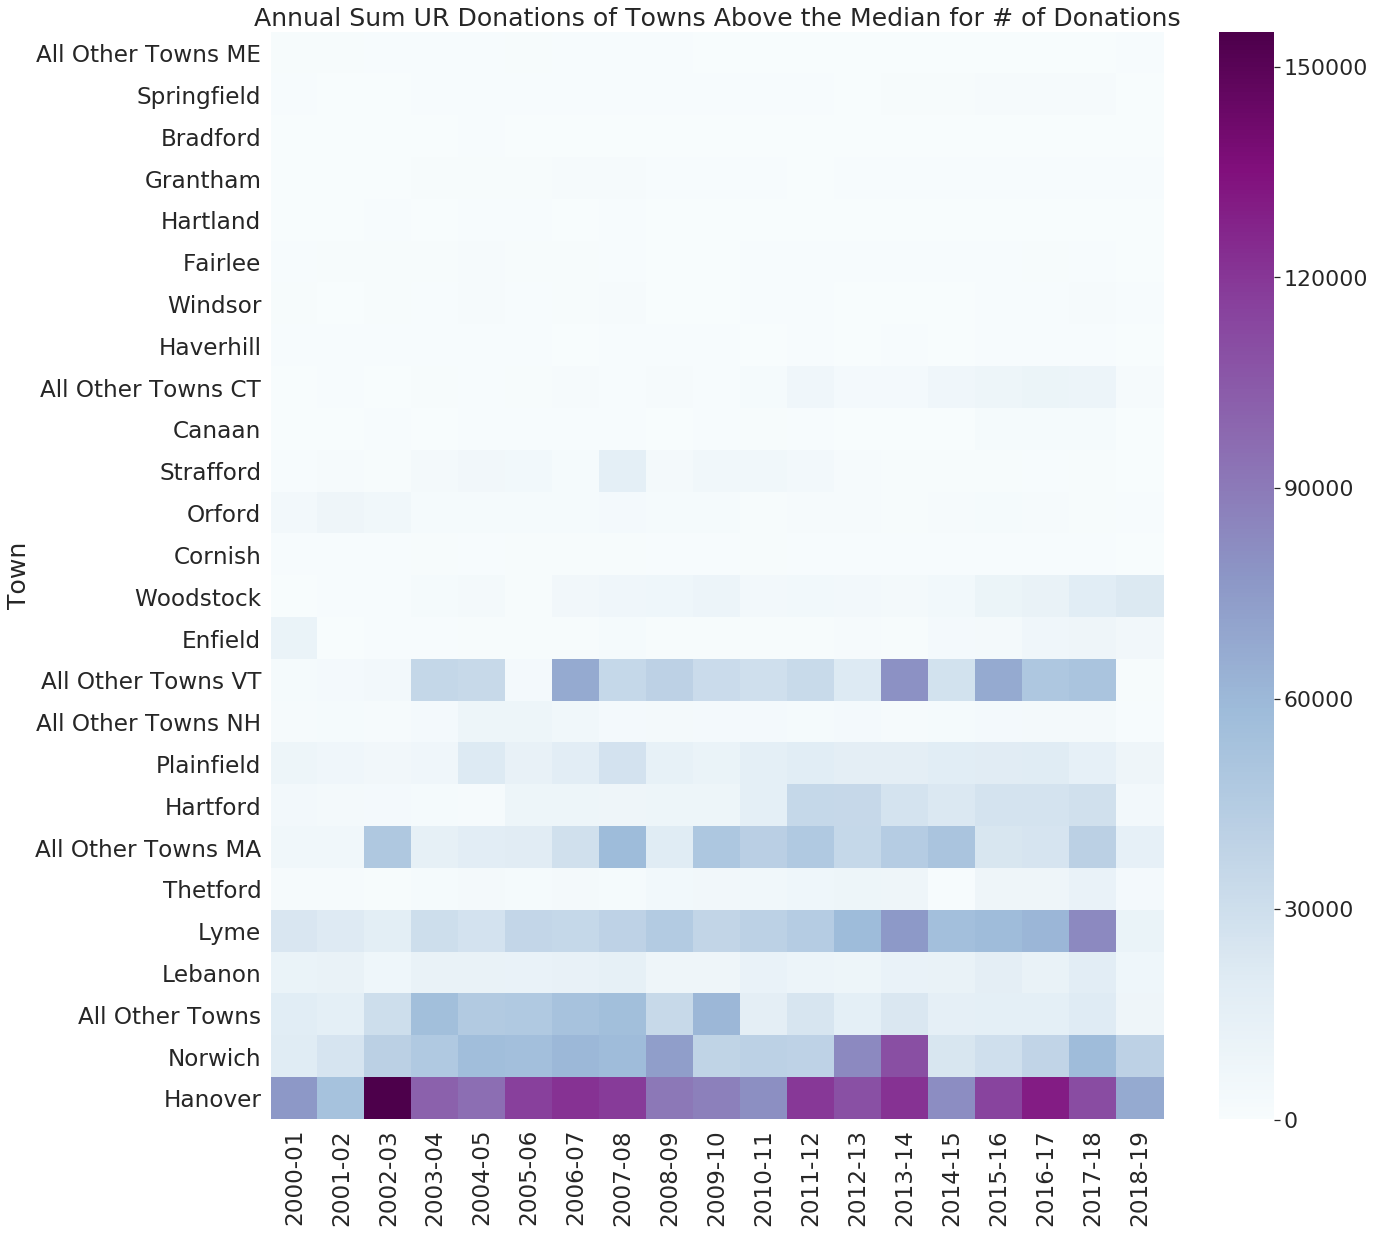

In [42]:
#represent above-median towns on a heatmap
REAL_top_half = top_half_towns.drop(['TownID','Total Unrestricted Donations','Total # Unrestricted Donations'], axis = 1)
plt.figure(figsize=(20,20))
plt.title('Annual Sum UR Donations of Towns Above the Median for # of Donations')
sns.set(font_scale=2)
sns.heatmap(REAL_top_half, cmap = 'BuPu')

### What can we learn from this heatmap?
With fewer towns included, can see more of the variation between towns. But still, no clear patterns emerge across towns. Hanover donates most of all, but we could tell that from the first heatmap in this notebook. Total donation amounts in Lyme have increased over time. 

Because these rows are ordered from least to most "Total # UR Donations," we see a few interesting patterns. Although Lebanon has one of the highest donation counts, their total annual donation amounts are comparatively low. The same is true of Thetford. Perhaps this has to do with the median household income of these towns? We can refer to the plotly express map that we created for this project to see whether the medianHHincomes in Thetford and Lebanon are lower than the other towns with similarly high donation counts (Lyme, All Other Towns MA, etc.)